# Superconductivity: Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import sklearn as sklearn
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures as poly
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

In [ ]:
##This block is only for access of files using google drive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id':"1f4jhMIZarZgD2AHr6v_crBOjTWqwZLoV"})   # replace the id with id of file you want to access
downloaded.GetContentFile('db_superconductors.csv')        # replace the file name with your file

downloaded = drive.CreateFile({'id':"1DNa6_oIzDmvuYdk2svOd9rJbRB4TiDFd"})   # replace the id with id of file you want to access
downloaded.GetContentFile('db_composition.csv')        # replace the file name with your file


In [ ]:
db_SC = pd.read_csv("db_superconductors.csv"); #dataframe structure
db_Comp = pd.read_csv("db_composition.csv");

In [ ]:
db_SC.shape

(21263, 82)

In [ ]:
feats = db_SC.columns[1:-1];
feats.shape

(80,)

In [ ]:
X = db_SC[feats];
Y = db_SC["critical_temp"];
print(X.shape)
print(Y.shape)

(21263, 80)
(21263,)


In [ ]:
train_size = 0.8;

X_train_unshuffled = np.array(X[:int(X.shape[0]*train_size)]);
X_test_unshuffled = np.array(X[int(X.shape[0]*train_size):]);

Y_train_unshuffled = np.array(Y[:int(Y.shape[0]*train_size)]);
Y_test_unshuffled = np.array(Y[int(Y.shape[0]*train_size):]);

In [ ]:
shuffler_train = np.random.permutation(len(Y_train_unshuffled));
X_train = X_train_unshuffled[shuffler_train];
Y_train = Y_train_unshuffled[shuffler_train].reshape((X_train.shape[0],1))

shuffler_test = np.random.permutation(len(Y_test_unshuffled));
X_test = X_test_unshuffled[shuffler_test];
Y_test = Y_test_unshuffled[shuffler_test].reshape((X_test.shape[0],1));

xmin = np.amin(X_train, axis=0);
xmax = np.amax(X_train, axis=0);

X_train = (X_train-xmin)/(xmax-xmin);
X_test = (X_test-xmin)/(xmax-xmin);

print("X_train set shape:",X_train.shape)
print("X_test set shape:",X_test.shape)
print("Y_train set shape:",Y_train.shape)
print("Y_test set shape:",Y_test.shape)

X_train set shape: (17010, 80)
X_test set shape: (4253, 80)
Y_train set shape: (17010, 1)
Y_test set shape: (4253, 1)


In [ ]:
LS_reg = linear_model.LinearRegression();   # create linear_reg method
LS_reg.fit(X_train, Y_train);               # perform lin_regression
print('Coeff:', LS_reg.coef_);              # print coefficients i.e. weights
print('\nIntercept:',LS_reg.intercept_);    # print intercept i.e. bias

# Training Performance:
pred_train = LS_reg.predict(X_train);                                   # training set predictions
R2_LS_train = r2_score(Y_train, pred_train);                            # trainig R2 score
MAE_LS_train = mean_absolute_error(Y_train, pred_train);                # training mean absolute error
RMSE_LS_train = mean_squared_error(Y_train, pred_train)**0.5;           # training root mean square error

avg_per_err_train = np.around(np.mean(
                    np.absolute((pred_train - Y_train)/Y_train)*100),decimals=3);

# printing training set results
print('\nR2 score(Training set) = %.3f'%R2_LS_train);
print('MAE_Least Square(Training set) = %.3f'%MAE_LS_train);
print('RMSE_Least Square(Training set) = %.3f'%RMSE_LS_train);
print('Avg. % Error (Training set) = ',avg_per_err_train);

# Testing Performance
pred_test = LS_reg.predict(X_test);                                     # testing set predictions
R2_LS_test = r2_score(Y_test, pred_test);                               # testing R2 score
MAE_LS_test= mean_absolute_error(Y_test, pred_test);                    # testing mean absolute error
RMSE_LS_test= mean_squared_error(Y_test, pred_test)**0.5;               # testing root mean square error

avg_per_err_test = np.around(np.mean(
        np.absolute((pred_test - Y_test)/Y_test)*100),decimals=3
        );                                                              # testing: average percentage error

# Printing testing set results
print('\nR2 score(Testing set) = %.3f'%R2_LS_test);
print('MAE_Least Square(Testing set) = %.3f'%MAE_LS_test);
print('RMSE_Least Square(Testing set) = %.3f'%RMSE_LS_test);
print('Avg. % Error (Testing set) = ', avg_per_err_test);

Coeff: [[ 194.0950046  -151.49598813 -122.77018349  101.7684815   -59.17633756
    16.34045565   43.59146033    2.23712357  -60.29477075    7.60138226
   168.97501953 -268.64995368 -172.5613334   274.08737685 -234.49649195
   150.00624931  101.41627243   46.9440842  -133.48408596   15.01387987
    82.56186754  644.91916079 -162.8242532  -551.15213356   76.58339863
    46.11177156   67.8433266   -28.09193189  -94.23986845   -7.77715793
  -104.8680463   -48.56059956   29.84534054   82.05936982    8.12519004
   -22.3879836   -44.03583262   13.19941196   66.6743257    -8.41654503
   -61.88191569  232.44360568   72.1526173  -230.89771851   23.21588074
   -48.72567664 -119.63724494  -42.15986803  222.86399108 -124.7409626
   179.58037945 -178.42508382 -143.08707655  129.29495274  -50.17723045
    55.53788096  -48.4324924    68.93460376  -20.31419954   30.37233759
     1.93056422  175.42769436  -32.98219807  -97.46829728   10.94374378
    11.08990356  -63.76311869  -71.81081167   67.43476853 

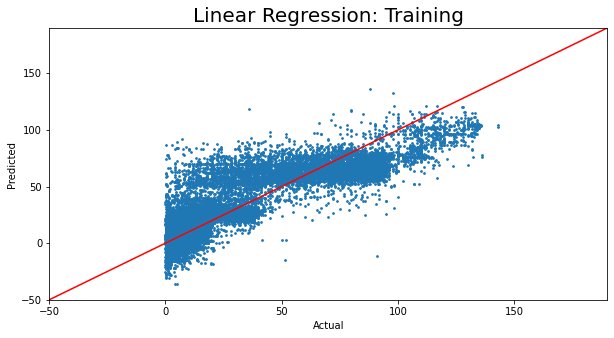

In [ ]:
plt.figure(figsize=(10,5));
plt.scatter(Y_train, pred_train, s=3);
plt.plot([-50,190],[-50,190],color="r");
plt.xlim(-50,190);
plt.ylim(-50,190);
plt.title("Linear Regression: Training",size=20);
plt.xlabel("Actual",size=10);
plt.ylabel("Predicted",size=10);

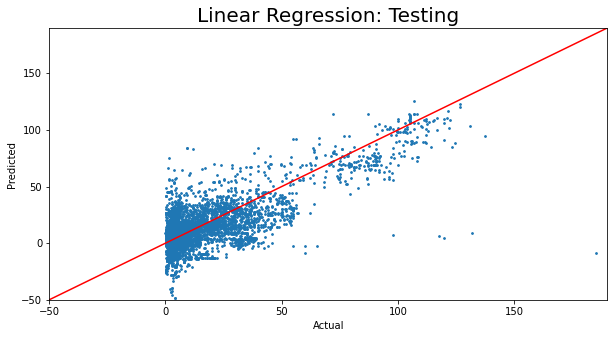

In [ ]:
plt.figure(figsize=(10,5));
plt.scatter(Y_test, pred_test,s=3);
plt.plot([-50,190],[-50,190],color="r");
plt.xlim(-50,190);
plt.ylim(-50,190);
plt.title("Linear Regression: Testing",size=20);
plt.xlabel("Actual",size=10);
plt.ylabel("Predicted",size=10);

# Superconductivity: DECISION TREE

In [ ]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from collections import defaultdict
from scipy.stats import spearmanr
from scipy.cluster import hierarchy

from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

In [ ]:
dt_function = tree.DecisionTreeRegressor();
dt_mod = dt_function.fit(X_train, Y_train);

train_score = dt_mod.score(X_train,Y_train)*100;
test_score = dt_mod.score(X_test,Y_test)*100;

print("\nScore Training: %.2f "%train_score,"%");
print("\nScore Testing: %.2f "%test_score,"%");

print("\nFeature Importance: ");
print(dt_mod.feature_importances_);


Score Training: 98.37  %

Score Testing: 9.37  %

Feature Importance: 
[2.34720501e-03 4.81109747e-03 2.89873298e-03 2.00665832e-03
 2.80733246e-03 5.62549100e-01 2.78817486e-03 6.90636117e-03
 3.63596544e-02 8.33010940e-03 3.02134052e-04 1.49049748e-03
 1.29757923e-03 2.24142919e-03 1.37372939e-03 1.32325877e-02
 2.38863346e-03 3.47413723e-03 5.44981420e-04 3.96558308e-03
 7.41025766e-04 6.38695535e-03 2.08910697e-03 1.49400946e-03
 1.21944981e-03 1.54816411e-03 3.36886437e-03 1.77053175e-03
 6.48803385e-03 2.62213977e-03 2.30058904e-03 1.39437237e-03
 2.75376326e-03 2.03903449e-02 4.49621549e-04 2.93363892e-03
 4.41455689e-04 4.65156324e-03 1.25314847e-03 5.38454083e-03
 3.55117749e-04 2.94000834e-02 7.64156894e-03 8.51903615e-03
 1.96915367e-03 1.89892951e-03 4.42960307e-04 3.55787791e-03
 1.08859009e-03 2.02538342e-02 1.07683970e-03 4.96900497e-03
 2.94227401e-03 1.84956991e-03 1.88606431e-03 5.13906294e-03
 2.23616650e-03 1.86493319e-03 1.82592933e-03 1.96471958e-03
 2.25891254e-

In [ ]:
pred_train_DT = dt_mod.predict(X_train);
pred_test_DT = dt_mod.predict(X_test);

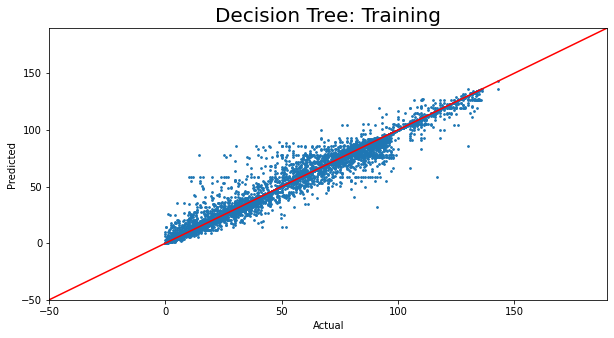

In [ ]:
plt.figure(figsize=(10,5));
plt.scatter(Y_train, pred_train_DT, s=3);
plt.plot([-50,190],[-50,190],color="r");
plt.xlim(-50,190);
plt.ylim(-50,190);
plt.title("Decision Tree: Training",size=20);
plt.xlabel("Actual",size=10);
plt.ylabel("Predicted",size=10);

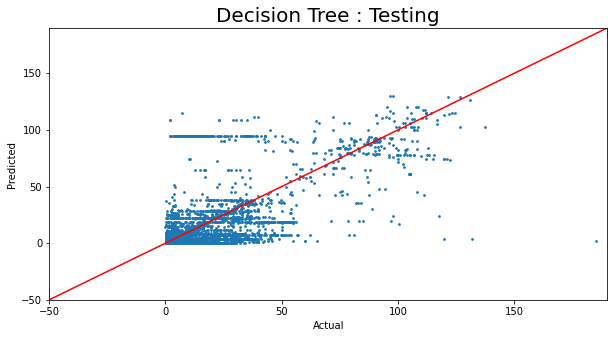

In [ ]:
plt.figure(figsize=(10,5));
plt.scatter(Y_test, pred_test_DT,s=3);
plt.plot([-50,190],[-50,190],color="r");
plt.xlim(-50,190);
plt.ylim(-50,190);
plt.title("Decision Tree : Testing",size=20);
plt.xlabel("Actual",size=10);
plt.ylabel("Predicted",size=10);

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
n_trees = 10;
RF_function = RandomForestRegressor(n_estimators=int(n_trees))
RF_mod = RF_function.fit(X_train, Y_train)

train_score = RF_mod.score(X_train,Y_train)*100;
test_score = RF_mod.score(X_test,Y_test)*100;

print("\nScore Training: %.2f "%train_score,"%");
print("\nScore Testing: %.2f "%test_score,"%");

print("\nFeature Importance: ");
print(RF_mod.feature_importances_);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until



Score Training: 97.32  %

Score Testing: 63.67  %

Feature Importance: 
[1.04343232e-03 4.07194804e-03 9.37621694e-04 1.35305611e-03
 1.39063876e-03 5.53442309e-01 9.39987411e-04 1.14528736e-02
 2.59048727e-02 8.32115299e-03 5.95268158e-04 2.75451555e-03
 1.31362579e-03 1.74957375e-03 1.36198486e-03 7.20786280e-03
 2.45228824e-03 5.50806986e-03 1.31879042e-03 4.47612063e-03
 1.07176468e-03 4.74335894e-03 7.68374324e-04 2.58889199e-03
 1.10479221e-03 5.43964377e-03 6.45293935e-03 4.54928510e-03
 4.21567569e-03 6.64685150e-03 2.33640570e-03 1.95714163e-03
 4.98743719e-03 1.90513628e-02 3.57167945e-03 6.87167054e-03
 2.17474441e-04 2.15353960e-03 6.63729841e-03 4.21959465e-03
 1.32291369e-03 6.78991514e-03 3.24014896e-03 5.08091920e-03
 1.87722374e-03 3.14211449e-03 8.33100498e-04 1.03427044e-02
 1.11072736e-02 1.94517255e-02 1.52576069e-03 3.60796878e-03
 8.08744225e-04 2.55647116e-03 1.58631932e-03 5.70011592e-03
 1.35196867e-03 1.90543395e-03 1.58238360e-03 2.90447587e-03
 2.85880281e

In [ ]:
pred_train_RF = RF_mod.predict(X_train);
pred_test_RF = RF_mod.predict(X_test);

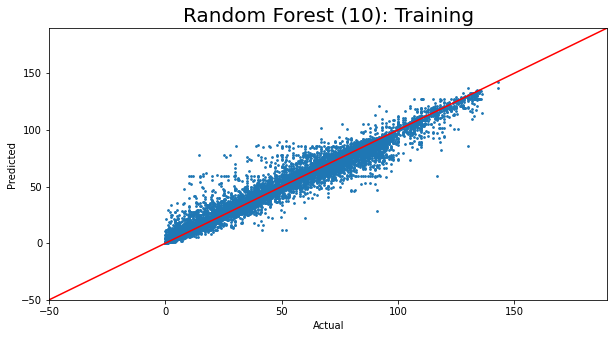

In [ ]:
plt.figure(figsize=(10,5));
plt.scatter(Y_train, pred_train_RF, s=3);
plt.plot([-50,190],[-50,190],color="r");
plt.xlim(-50,190);
plt.ylim(-50,190);
plt.title("Random Forest (" + str(n_trees) + "): Training",size=20);
plt.xlabel("Actual",size=10);
plt.ylabel("Predicted",size=10);

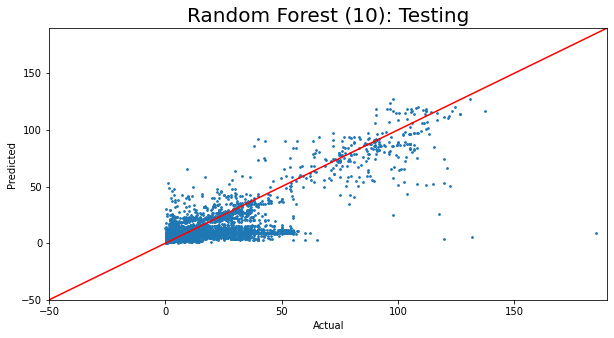

In [ ]:
plt.figure(figsize=(10,5));
plt.scatter(Y_test, pred_test_RF, s=3);
plt.plot([-50,190],[-50,190],color="r");
plt.xlim(-50,190);
plt.ylim(-50,190);
plt.title("Random Forest (" + str(n_trees) + "): Testing",size=20);
plt.xlabel("Actual",size=10);
plt.ylabel("Predicted",size=10);

In [ ]:
def f_plot_tree(clf):
    fig = plt.figure(figsize=(100,100))
    _ = tree.plot_tree(clf,
                   feature_names=feats,
                    class_names=["F","B","F+B","F+I","B+I","F+B+I","I"],
                   filled=True)


def f_plot_importance(mod, X, Y, feats, n):

    tree_MDI_importance = mod.feature_importances_;
    tree_importance_sorted_idx = np.argsort(tree_MDI_importance);
    tree_indices = np.arange(0, len(mod.feature_importances_)) + 0.5;

    feats = np.array(feats)


    p_imp_result = permutation_importance(mod, X, Y, n_repeats=int(n));
    perm_sorted_idx = p_imp_result.importances_mean.argsort();

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 11));

    ax1.barh(tree_indices,
             tree_MDI_importance[tree_importance_sorted_idx], height=0.7);
    ax1.set_yticklabels(feats[tree_importance_sorted_idx], fontsize=14);
    ax1.set_yticks(tree_indices);
    ax1.set_ylim((0, len(mod.feature_importances_)));
    ax1.set_title("MDI Feature Importances", fontsize=20) # Mean Decrease in Impurity (MDI)

    ax2.boxplot(p_imp_result.importances[perm_sorted_idx].T, vert=False);
    ax2.set_yticklabels(feats[perm_sorted_idx],fontsize=14);
    ax2.set_title("Permutation Feature Importances", fontsize=20)


    fig.tight_layout();
    plt.show();

    return (perm_sorted_idx)

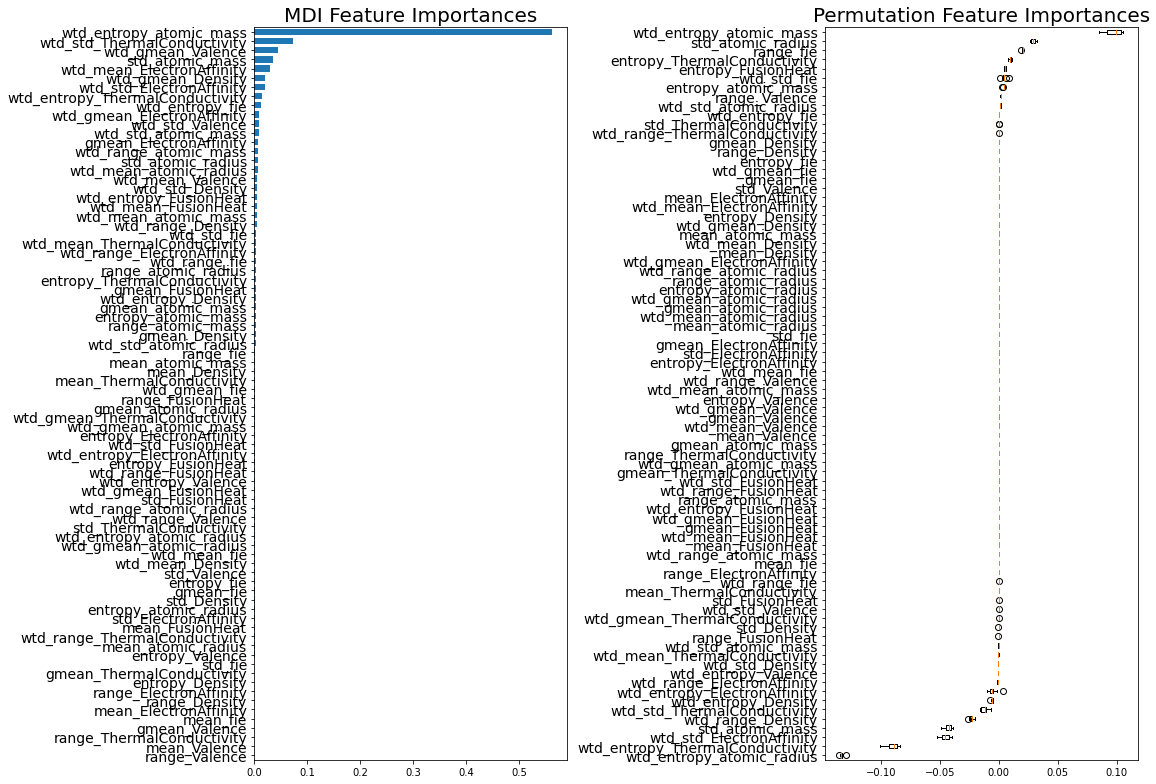

In [ ]:
sort_feat_index = f_plot_importance(dt_mod, X, Y, feats, 10);
sorted_feats = feats[sort_feat_index];

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  



Score Training: 97.06  %

Score Testing: 54.26  %

Feature Importance: 
[0.02732254 0.0388399  0.0521404  0.05328041 0.02094883 0.13448501
 0.03916364 0.0282205  0.04629215 0.55930662]


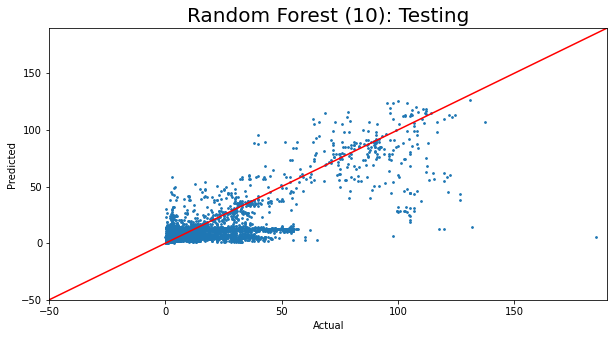

In [ ]:
X_train_imp = X_train[:,sort_feat_index[0:10]];
X_test_imp = X_test[:,sort_feat_index[0:10]];

n_trees = 10;
RF_function = RandomForestRegressor(n_estimators=int(n_trees))
RF_mod = RF_function.fit(X_train_imp, Y_train)

train_score = RF_mod.score(X_train_imp,Y_train)*100;
test_score = RF_mod.score(X_test_imp,Y_test)*100;

print("\nScore Training: %.2f "%train_score,"%");
print("\nScore Testing: %.2f "%test_score,"%");

print("\nFeature Importance: ");
print(RF_mod.feature_importances_);

pred_test_RF = RF_mod.predict(X_test_imp);

plt.figure(figsize=(10,5));
plt.scatter(Y_test, pred_test_RF, s=3);
plt.plot([-50,190],[-50,190],color="r");
plt.xlim(-50,190);
plt.ylim(-50,190);
plt.title("Random Forest (" + str(n_trees) + "): Testing",size=20);
plt.xlabel("Actual",size=10);
plt.ylabel("Predicted",size=10);

In [ ]:
sort_feat_index[0:10]

array([25, 65, 49,  8, 37, 69, 35, 45, 47, 75])

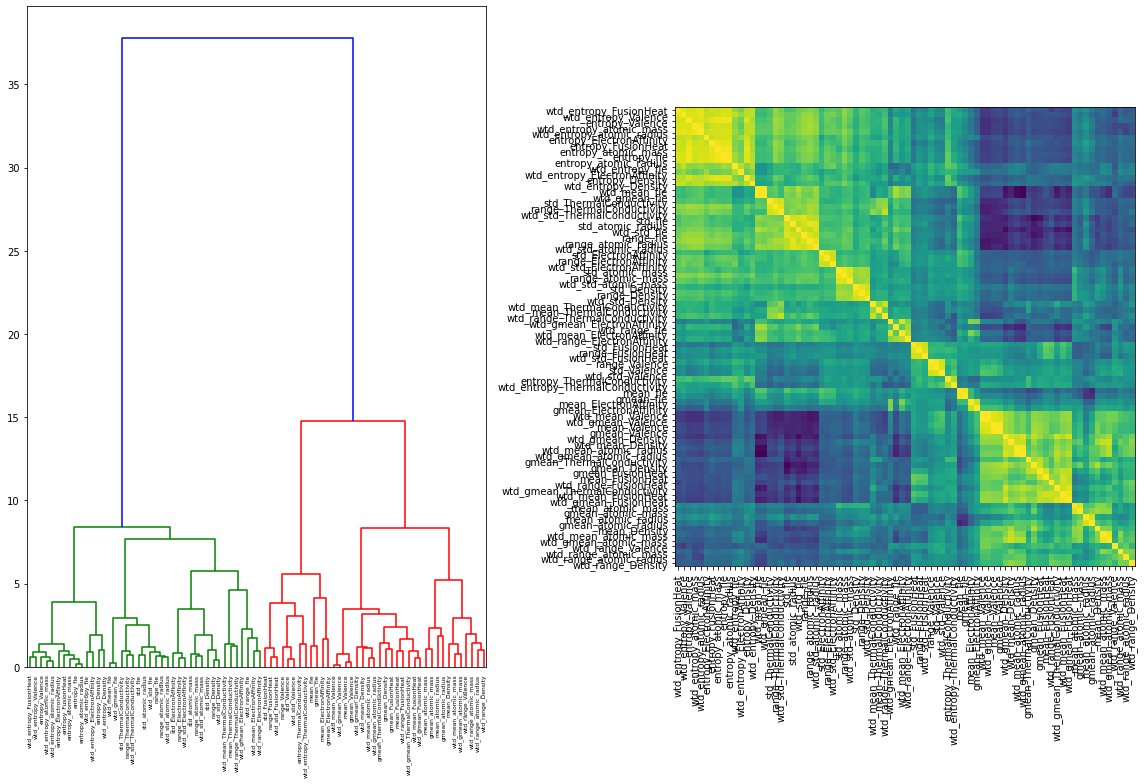

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 11))

corr = spearmanr(X).correlation
corr_linkage = hierarchy.ward(corr)
dendro = hierarchy.dendrogram(
    corr_linkage, labels=feats, ax=ax1, leaf_rotation=90)
dendro_idx = np.arange(0, len(dendro['ivl']))

ax2.imshow(corr[dendro['leaves'], :][:, dendro['leaves']])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro['ivl'], rotation='vertical')
ax2.set_yticklabels(dendro['ivl'])
fig.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  



Score Training: 97.31  %

Score Testing: 60.31  %


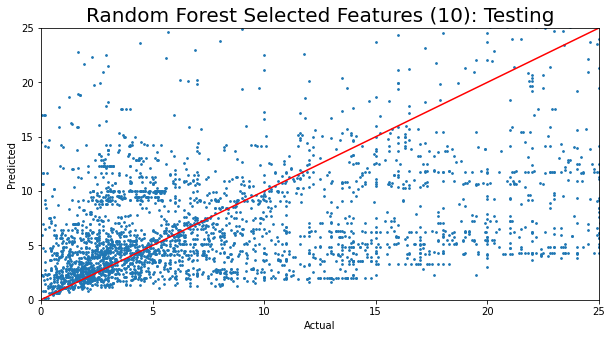

In [ ]:
cluster_ids = hierarchy.fcluster(corr_linkage, 1, criterion='distance')
cluster_id_to_feature_ids = defaultdict(list)

for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)

selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]

X_train_sel = X_train[:, selected_features]
X_test_sel = X_test[:, selected_features]

n_trees = 10;
RF_function = RandomForestRegressor(n_estimators=int(n_trees));
RF_mod_sel = RF_function.fit(X_train_sel, Y_train);

train_score = RF_mod_sel.score(X_train_sel,Y_train)*100;
test_score = RF_mod_sel.score(X_test_sel,Y_test)*100;

print("\nScore Training: %.2f "%train_score,"%");
print("\nScore Testing: %.2f "%test_score,"%");

pred_test_RF_sel = RF_mod_sel.predict(X_test_sel);

plt.figure(figsize=(10,5));
plt.scatter(Y_test, pred_test_RF_sel, s=3);
plt.plot([-50,190],[-50,190],color="r");
plt.xlim(0,25);
plt.ylim(0,25);
plt.title("Random Forest Selected Features (" + str(n_trees) + "): Testing",size=20);
plt.xlabel("Actual",size=10);
plt.ylabel("Predicted",size=10);
#plt.xscale("log"); plt.yscale("log")